In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
file_path = r'C:\Users\s562894\Projects\GDP-Project-Group5-Functionalities-for-a-stock-prediction-system\Data\MSFT.csv'
df = pd.read_csv(file_path)
df.head()
df.shape


(251, 7)

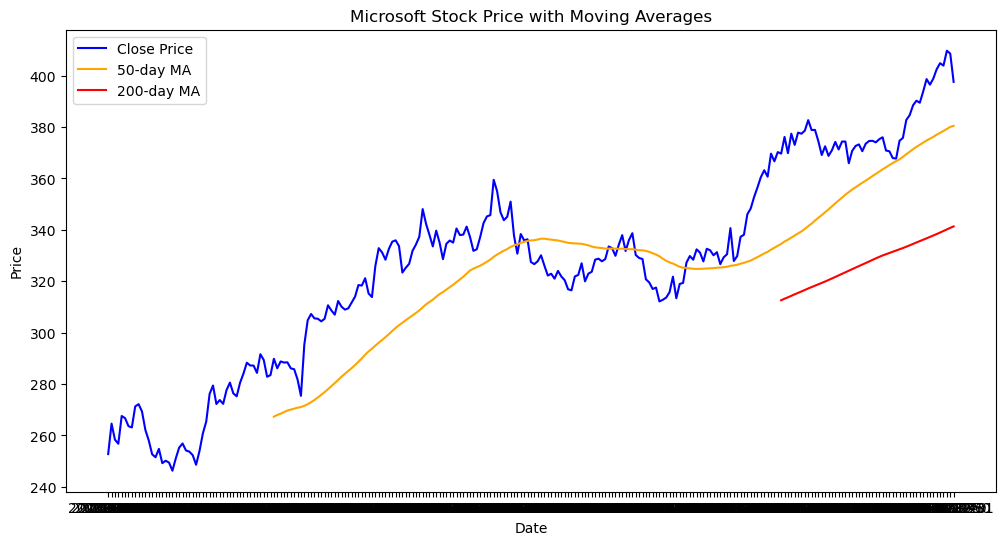

In [15]:

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA50'], label='50-day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-day MA', color='red')
plt.title('Microsoft Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:

df['Date'] = pd.to_datetime(df['Date'])
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA50         0
MA200        0
dtype: int64


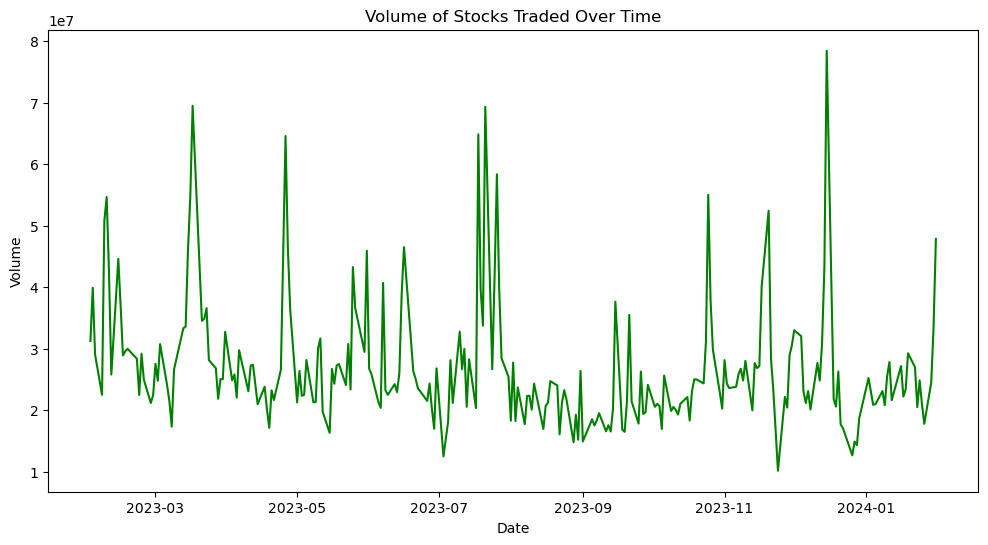

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='green')
plt.title('Volume of Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()